<a href="https://colab.research.google.com/github/nbeeeel/Video-Classification-Network/blob/main/Football_Match_Actions_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**

In [1]:
from google.colab import files

**Downloading the Tensorflow Docs Library from [This Link](git+https://github.com/tensorflow/docs)**

In [2]:
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


In [3]:
from tensorflow_docs.vis import embed
from tensorflow import keras
from imutils import paths

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import cv2
import os
import shutil

#**Downloading the dataset from kaggle.**

**From google colab we will import files library to upload kaggle.json file that we will download from our kaggle account in order to connect it to our google colab account for direct dataset downloading**

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nbeelkhan","key":"d9a1ec990904a3588ddd932bfd0e638f"}'}

#**Setting up api-pin for kaggle dataset-downloading**

**In order to download the dataset from kaggle, we need to follow these steps:**


*   Login to your kaggle account.
*   Click on your profile picture, a menu will slide. There click on the Account icon.
*   There scroll down until you find the api section.There click on create new api.
*   Download it in your computer and load it by running the above cell with files.upload() method.
*   Then follow the below procedure to grant permissions and set up the api on google colab.











In [5]:
!mkdir ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

**To download datasets from kaggle you can do one of the following:**

1. !kaggle datasets download -d (dataset source from the url i.e. kaggle.com/datasets/"dataset source")
2. !kaggle competitions download -c (dataset source from the url i.e. kaggle.com/competitions/"dataset source")

**Remember competitions is for competitions datasets and the first one is for general datasets.You'll clearly see the dataset type in the url.**


In [8]:
!kaggle datasets download -d itarek898/football-match-actions-video-dataset

100% 2.77G/2.78G [00:24<00:00, 126MB/s]
100% 2.78G/2.78G [00:24<00:00, 123MB/s]


In [9]:
!unzip football-match-actions-video-dataset.zip

Archive:  football-match-actions-video-dataset.zip
  inflating: football match action video dataset/Red Card/Red Card 50.avi  
  inflating: football match action video dataset/Red Card/Red Card1.avi  
  inflating: football match action video dataset/Red Card/Red Card10.avi  
  inflating: football match action video dataset/Red Card/Red Card11.avi  
  inflating: football match action video dataset/Red Card/Red Card12.avi  
  inflating: football match action video dataset/Red Card/Red Card13.avi  
  inflating: football match action video dataset/Red Card/Red Card14.avi  
  inflating: football match action video dataset/Red Card/Red Card15.avi  
  inflating: football match action video dataset/Red Card/Red Card16.avi  
  inflating: football match action video dataset/Red Card/Red Card17.avi  
  inflating: football match action video dataset/Red Card/Red Card18.avi  
  inflating: football match action video dataset/Red Card/Red Card19.avi  
  inflating: football match action video dataset/

#**Pre-processing the dataset**

**Fetching the labels from the dataset directory**

In [10]:
labels = []
for names in os.listdir('/content/football match action video dataset'):
  labels.append(names) 

In [11]:
print(labels)

['Red Card', 'takling', 'scoring']


**Creating a train/test directories along with the corresponding classes by looping through all the fetched labels.**

In [30]:
os.mkdir('Dataset')
os.mkdir('Dataset/train')
os.mkdir('Dataset/test')
for label in labels:
  os.mkdir('Dataset/train/'+label)
  os.mkdir('Dataset/test/'+label)

**Allocating the paths**

In [31]:
train_path = '/content/Dataset/train'
test_path = '/content/Dataset/test'
Main = '/content/football match action video dataset'

In [32]:
for label in labels:
  print("The number of items in "+ label +" is ",len(os.listdir(os.path.join(Main,label))))

The number of items in Red Card is  58
The number of items in takling is  74
The number of items in scoring is  273


**Creating a custom train-test split.**

In [33]:
for label in labels:
  i=0
  j=0
  for item in os.listdir(os.path.join(Main,label)):
    if (label != "scoring"):
      if (i<int(len(os.listdir(os.path.join(Main,label)))*0.8)):
        if (item[-3:]=="avi"):
          shutil.copy(os.path.join(Main,label,item),os.path.join(train_path,label))
          print(i," item moved from ",label," to train")
          i+=1
      elif (j<int(len(os.listdir(os.path.join(Main,label)))*0.2)):
        if item not in os.listdir(os.path.join(train_path,label)):
          if(item[-3:]=="avi"):
            shutil.copy(os.path.join(Main,label,item),os.path.join(test_path,label))
            print(j," items moved from ",label," to test" )
            j+=1
      
    if(label == "scoring"):
      if (i<int(len(os.listdir(os.path.join(Main,label)))*0.27)):
        if (item[-3:]=="avi"):
          shutil.copy(os.path.join(Main,label,item),os.path.join(train_path,label))
          print(i," item moved from ",label," to train")
          i+=1
      elif (j<int(len(os.listdir(os.path.join(Main,label)))*0.07)):
        if item not in os.listdir(os.path.join(train_path,label)):
          if(item[-3:]=="avi"):
            shutil.copy(os.path.join(Main,label,item),os.path.join(test_path,label))
            print(j," items moved from ",label," to test" )
            j+=1
    

0  item moved from  Red Card  to train
1  item moved from  Red Card  to train
2  item moved from  Red Card  to train
3  item moved from  Red Card  to train
4  item moved from  Red Card  to train
5  item moved from  Red Card  to train
6  item moved from  Red Card  to train
7  item moved from  Red Card  to train
8  item moved from  Red Card  to train
9  item moved from  Red Card  to train
10  item moved from  Red Card  to train
11  item moved from  Red Card  to train
12  item moved from  Red Card  to train
13  item moved from  Red Card  to train
14  item moved from  Red Card  to train
15  item moved from  Red Card  to train
16  item moved from  Red Card  to train
17  item moved from  Red Card  to train
18  item moved from  Red Card  to train
19  item moved from  Red Card  to train
20  item moved from  Red Card  to train
21  item moved from  Red Card  to train
22  item moved from  Red Card  to train
23  item moved from  Red Card  to train
24  item moved from  Red Card  to train
25  item m

In [34]:
for label in labels:
  print("The number of items in training data --"+ label +" is ",len(os.listdir(os.path.join(train_path,label))))
  print("The number of items in testing data --"+ label +" is ",len(os.listdir(os.path.join(test_path,label))))

The number of items in training data --Red Card is  46
The number of items in testing data --Red Card is  11
The number of items in training data --takling is  59
The number of items in testing data --takling is  14
The number of items in training data --scoring is  73
The number of items in testing data --scoring is  19


#**Creating a DataFrame Of Test & Train Data**

In [35]:
data = []
for label in os.listdir(train_path):
  all_labels = os.listdir(os.path.join(train_path,label))

  for file in all_labels:
     if (file[-3:]=="avi"):
       data.append((label,os.path.join(train_path,label,file)))

train_df=pd.DataFrame(data=data,columns=['label','video'])

In [36]:
df = train_df.loc[:,['video','label']]
df.to_csv('train.csv')

In [37]:
train_df.head()

,label,video
0,Red Card,/content/Dataset/train/Red Card/Red Card19.avi
1,Red Card,/content/Dataset/train/Red Card/Red Card57.avi
2,Red Card,/content/Dataset/train/Red Card/Red Card4.avi
3,Red Card,/content/Dataset/train/Red Card/Red Card33.avi
4,Red Card,/content/Dataset/train/Red Card/Red Card15.avi


In [38]:
train_df.tail()

,label,video
173,scoring,/content/Dataset/train/scoring/scoring 159.avi
174,scoring,/content/Dataset/train/scoring/scoring 122.avi
175,scoring,/content/Dataset/train/scoring/scoring 108.avi
176,scoring,/content/Dataset/train/scoring/scoring 51.avi
177,scoring,/content/Dataset/train/scoring/scoring 149.avi


In [39]:
data = []
for label in os.listdir(test_path):
  all_labels = os.listdir(os.path.join(test_path,label))

  for file in all_labels:
    if (file[-3:]=="avi"):
       data.append((label,os.path.join(test_path,label,file)))

test_df=pd.DataFrame(data=data,columns=['label','video'])

In [40]:
test_df.head()

,label,video
0,Red Card,/content/Dataset/test/Red Card/Red Card52.avi
1,Red Card,/content/Dataset/test/Red Card/Red Card25.avi
2,Red Card,/content/Dataset/test/Red Card/Red Card62.avi
3,Red Card,/content/Dataset/test/Red Card/Red Card2.avi
4,Red Card,/content/Dataset/test/Red Card/Red Card8.avi


In [41]:
test_df.tail()

,label,video
39,scoring,/content/Dataset/test/scoring/scoring 88.avi
40,scoring,/content/Dataset/test/scoring/scoring 129.avi
41,scoring,/content/Dataset/test/scoring/scoring 55.avi
42,scoring,/content/Dataset/test/scoring/scoring 36.avi
43,scoring,/content/Dataset/test/scoring/scoring 32.avi


In [42]:
df = test_df.loc[:,['video','label']]
df.to_csv('test.csv')

**Defining the training parameters and the number of frame sequences and the number of features to extract from the clips.**


> Adjust the maximum sequence length and the batch size in accordance with your RAM and the processing speed. 

In [43]:
IMG_SIZE = 224
BATCH_SIZE = 10
EPOCHS = 50

MAX_SEQ_LENGTH = 10
NUM_FEATURES = 2048

In [44]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print(f"total training videos : {len(train_df)}")
print(f"total testing videos : {len(test_df)}")

total training videos : 178
total testing videos : 44


#**Processing the Model Input**

**Capturing the frames from the video for input to the feature extraction model**

In [45]:
def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

In [48]:
v_path = '/content/Dataset/test/Red Card/Red Card2.avi'


In [49]:
demo = load_video(v_path,10)
demo.shape

(10, 224, 224, 3)

**Using InceptionV3 Convolutional Model as a feature extractor. The pre-trained weights of imagenet are used.**

In [50]:
def build_feature_extractor():
  feature_extractor = keras.applications.InceptionV3(
      weights="imagenet",
      include_top=False,
      pooling="avg",
      input_shape=(IMG_SIZE,IMG_SIZE,3),
  )
  preprocess_input = keras.applications.inception_v3.preprocess_input

  inputs = keras.Input((IMG_SIZE,IMG_SIZE,3))
  preprocessed = preprocess_input(inputs)

  outputs = feature_extractor(preprocessed)

  return keras.Model(inputs, outputs, name="feature_extractor")

feature_extractor = build_feature_extractor()

87910968/87910968 [==============================] - 1s 0us/step


In [51]:
label_processor = keras.layers.StringLookup(
    num_oov_indices=0, vocabulary=np.unique(train_df["label"])
)
print(label_processor.get_vocabulary())

['Red Card', 'scoring', 'takling']


**Here the features are extracted from 10 frames per clip. If the number of frames for any clip fall shorter then 10 then the missing frames will be replaced by the padding masks.**

In [52]:
def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = df["video"].values.tolist()
    labels = df["label"].values
    labels = label_processor(labels[..., None]).numpy()

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool")
    frame_features = np.zeros(
        shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
    )

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels


train_data, train_labels = prepare_all_videos(train_df, "train")
test_data, test_labels = prepare_all_videos(test_df, "test")

print(f"Frame features in train set: {train_data[0].shape}")
print(f"Frame masks in train set: {train_data[1].shape}")

1/1 [==============================] - 0s 33ms/step
Frame features in train set: (178, 10, 2048)
Frame masks in train set: (178, 10)


**Feeding the extracted features to a Gated Recurrent Network.**

In [60]:
def get_sequence_model():
    class_vocab = label_processor.get_vocabulary()

    frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
    mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

    # Refer to the following tutorial to understand the significance of using `mask`:
    # https://keras.io/api/layers/recurrent_layers/gru/
    x = keras.layers.GRU(16, return_sequences=True)(
        frame_features_input, mask=mask_input
    )
    x = keras.layers.GRU(64)(x)
    x = keras.layers.Dropout(0.5)(x)
    x = keras.layers.Dense(16, activation="relu")(x)
    output = keras.layers.Dense(len(class_vocab), activation="softmax")(x)

    rnn_model = keras.Model([frame_features_input, mask_input], output)

    rnn_model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return rnn_model


**Training the network**

In [61]:
# Utility for running experiments.
def run_experiment():
    filepath = "/tmp/video_classifier"
    checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only=True, verbose=1
    )

    seq_model = get_sequence_model()
    history = seq_model.fit(
        [train_data[0], train_data[1]],
        train_labels,
        validation_split=0.3,
        epochs=EPOCHS,
        callbacks=[checkpoint],
    )

    seq_model.load_weights(filepath)
    _, accuracy = seq_model.evaluate([test_data[0], test_data[1]], test_labels)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")

    return history, seq_model

In [62]:
_, sequence_model = run_experiment()


Epoch 1/50
1/4 [======>.......................] - ETA: 25s - loss: 1.1187 - accuracy: 0.3750
Epoch 1: val_loss improved from inf to 1.68629, saving model to /tmp/video_classifier
4/4 [==============================] - 11s 822ms/step - loss: 1.0330 - accuracy: 0.4919 - val_loss: 1.6863 - val_accuracy: 0.0000e+00
Epoch 2/50
1/4 [======>.......................] - ETA: 0s - loss: 1.0216 - accuracy: 0.4375
Epoch 2: val_loss did not improve from 1.68629
4/4 [==============================] - 0s 26ms/step - loss: 1.0029 - accuracy: 0.4839 - val_loss: 1.8655 - val_accuracy: 0.0000e+00
Epoch 3/50
1/4 [======>.......................] - ETA: 0s - loss: 0.9872 - accuracy: 0.5000
Epoch 3: val_loss did not improve from 1.68629
4/4 [==============================] - 0s 24ms/step - loss: 0.9054 - accuracy: 0.6613 - val_loss: 1.8689 - val_accuracy: 0.0000e+00
Epoch 4/50
1/4 [======>.......................] - ETA: 0s - loss: 0.9887 - accuracy: 0.5625
Epoch 4: val_loss did not improve from 1.68629
4/4 [=

**Processing the video frames to feed the model for inference**

In [63]:
def prepare_single_video(frames):
    frames = frames[None, ...]
    frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :])
        frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

    return frame_features, frame_mask

In [64]:
def sequence_prediction(path):
    class_vocab = label_processor.get_vocabulary()

    frames = load_video(os.path.join("test", path))
    frame_features, frame_mask = prepare_single_video(frames)
    probabilities = sequence_model.predict([frame_features, frame_mask])[0]

    for i in np.argsort(probabilities)[::-1]:
        print(f"  {class_vocab[i]}: {probabilities[i] * 100:5.2f}%")
    return frames

In [65]:
def to_gif(images):
    converted_images = images.astype(np.uint8)
    imageio.mimsave("animation.gif", converted_images, fps=10)
    return embed.embed_file("animation.gif")

**Results from the model.**

*   Scoring : 50 %
*   Takling : 41.62%
*   Red Card : 7.70%

Test video path: /content/Dataset/test/scoring/scoring 55.avi
1/1 [==============================] - 3s 3s/step
  scoring: 50.68%
  takling: 41.62%
  Red Card:  7.70%



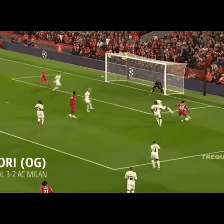

In [66]:
test_video = np.random.choice(test_df["video"].values.tolist())
print(f"Test video path: {test_video}")
test_frames = sequence_prediction(test_video)
to_gif(test_frames[:MAX_SEQ_LENGTH])

**============================THE END==============================**